In [4]:
from auto_robot_design.motion_planning.dataset_generator import Dataset

dataset = Dataset("D:\\Files\\Working\\auto-robotics-design\\test_top_8")

In [5]:
ws = dataset.get_workspace_by_sample(dataset.df.loc[3000])

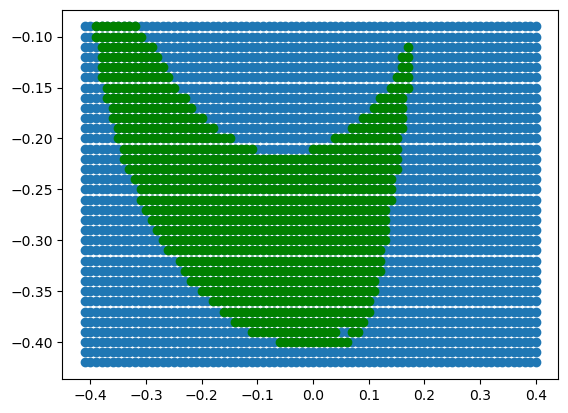

In [6]:
import matplotlib.pyplot as plt

reachable_pts = ws.reachable_points
pts = ws.points

plt.plot(reachable_pts[:,0],reachable_pts[:,1], "og")
plt.scatter(pts[:,0],pts[:,1])

In [7]:
import numpy as np
from auto_robot_design.user_interface.check_in_ellips import (
    Ellipse,
    check_points_in_ellips
)

ellipse = Ellipse(np.array([0.04,-0.31]), 0, np.array([0.04, 0.01]))
points_on_ellps = ellipse.get_points(0.1).T

reach_ws_points = ws.points
mask_ws_n_ellps = check_points_in_ellips(reach_ws_points, ellipse, 0.1)

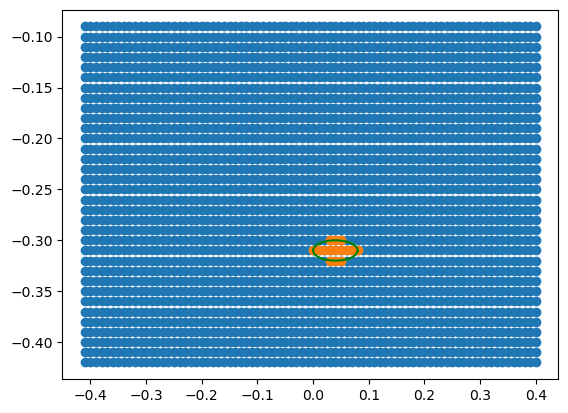

In [8]:
plt.plot(points_on_ellps[:,0], points_on_ellps[:,1], "g")
plt.scatter(pts[:,0],pts[:,1])
plt.scatter(reach_ws_points[mask_ws_n_ellps,:][:,0],reach_ws_points[mask_ws_n_ellps,:][:,1])

In [9]:
ellips_mask = np.zeros(ws.mask_shape, dtype=bool)
for point in reach_ws_points[mask_ws_n_ellps, :]:
    index = ws.calc_index(point)
    ellips_mask[tuple(index)] = True

In [10]:
ws_bool_flatten = np.asarray(dataset.df.values[:,dataset.params_size:], dtype=bool)
ell_mask_2d = ellips_mask.flatten()[np.newaxis :]
np.argwhere(np.sum(ell_mask_2d * ws_bool_flatten, axis=1) ==15).size

26230

In [11]:
dataset.get_all_design_indexes_cover_ellipse(ellipse).size

26230

In [12]:
name_col_ws = ["ws_" + str(i) for i in range(506)]
dens_ws_by_design = np.sum(dataset.df.values[:,dataset.params_size:],axis=0)/dataset.df.shape[0]

In [13]:
dataset.workspace.mask_shape

array([82, 34])

In [14]:
sort_dataset = np.array(sorted(dataset.df.values, key=lambda x: np.sum(x[dataset.params_size:]), reverse=True))

In [15]:
best_mask_ws = np.array(sort_dataset[0,dataset.params_size:], dtype=bool)
for id_design in np.arange(-100, 100):
    equal_ws = np.sum(best_mask_ws * np.array(sort_dataset[id_design,dataset.params_size:], dtype=bool))
    # param_distance = np.linalg.norm(sort_dataset[id_design,:dataset.params_size] - sort_dataset[0,:dataset.params_size], ord=np.inf)
    param_distance = np.sum(np.abs(sort_dataset[id_design,:dataset.params_size] - sort_dataset[0,:dataset.params_size]))
    print(param_distance, "--", equal_ws)

1.0650000000000002 -- 1
0.7900000000000001 -- 1
0.865 -- 1
0.9650000000000001 -- 1
1.065 -- 1
1.1250000000000002 -- 1
0.9500000000000002 -- 1
1.05 -- 1
0.925 -- 1
1.0250000000000001 -- 1
1.125 -- 1
1.0250000000000001 -- 1
0.9500000000000002 -- 1
0.925 -- 1
0.9250000000000003 -- 1
0.8250000000000002 -- 1
1.1650000000000003 -- 1
0.9900000000000002 -- 1
1.09 -- 1
0.9650000000000001 -- 1
1.0650000000000002 -- 1
1.0650000000000002 -- 1
0.9900000000000002 -- 1
0.9650000000000001 -- 1
0.9650000000000003 -- 1
0.8650000000000002 -- 1
1.2050000000000003 -- 1
1.1300000000000001 -- 1
1.1050000000000002 -- 1
1.1050000000000002 -- 1
1.0050000000000001 -- 1
1.0050000000000001 -- 1
0.9300000000000002 -- 1
0.905 -- 1
1.11 -- 1
0.9850000000000001 -- 1
1.0850000000000002 -- 1
1.0100000000000002 -- 1
0.9850000000000001 -- 1
0.9850000000000003 -- 1
1.1500000000000001 -- 1
1.1250000000000002 -- 1
1.0500000000000003 -- 1
1.0250000000000001 -- 1
1.0250000000000004 -- 1
1.1900000000000002 -- 1
1.16500000000000

0.09708243919473807
1869.0


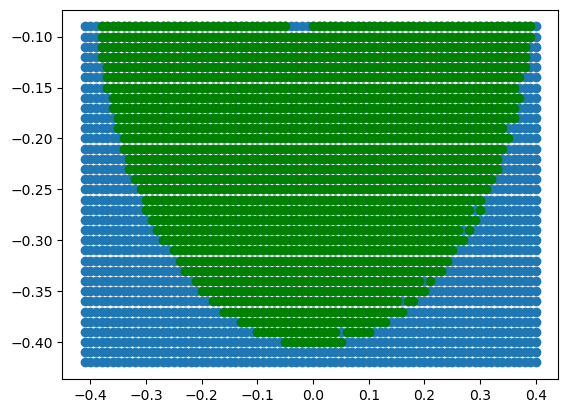

In [16]:
import pandas as pd

id_design = 15
print(np.linalg.norm(sort_dataset[id_design,:dataset.params_size] - sort_dataset[0,:dataset.params_size]))
print(np.sum(sort_dataset[id_design,dataset.params_size:]))
ws_test = dataset.get_workspace_by_sample(pd.Series(sort_dataset[id_design]))
reachable_pts = ws_test.reachable_points
pts = ws_test.points

plt.plot(reachable_pts[:,0],reachable_pts[:,1], "og")
plt.scatter(pts[:,0],pts[:,1])

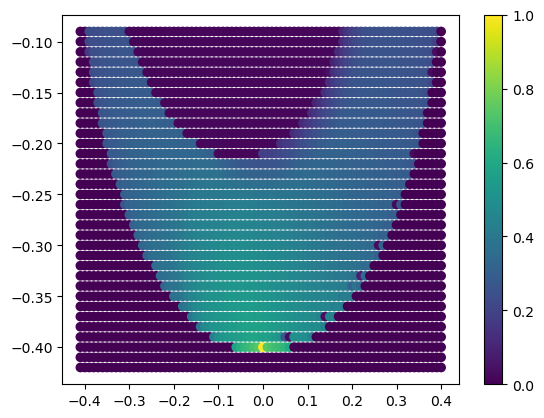

In [17]:
pts = dataset.workspace.points
plt.scatter(pts[:,0], pts[:,1],c=dens_ws_by_design)
plt.colorbar()

In [18]:
df = dataset.df.assign(volume_ws=lambda x: np.asarray(np.sum(x.values[:,dataset.params_size:],axis=1), dtype=int))

In [19]:
gnd_connection = df.values[:,(0,1,-1)]
main_knee = df.values[:,(2,-1)]
main_connection = df.values[:,(3,4,-1)]
branch = df.values[:,(6,5,-1)]

In [20]:
gnd_connection

array([[-2.000e-01, -2.900e-02,  1.263e+03],
       [-2.000e-01, -2.900e-02,  8.310e+02],
       [-2.000e-01, -2.900e-02,  5.790e+02],
       ...,
       [-2.000e-01, -2.900e-02,  1.726e+03],
       [-2.000e-01, -2.900e-02,  1.261e+03],
       [-2.000e-01, -2.900e-02,  8.670e+02]])

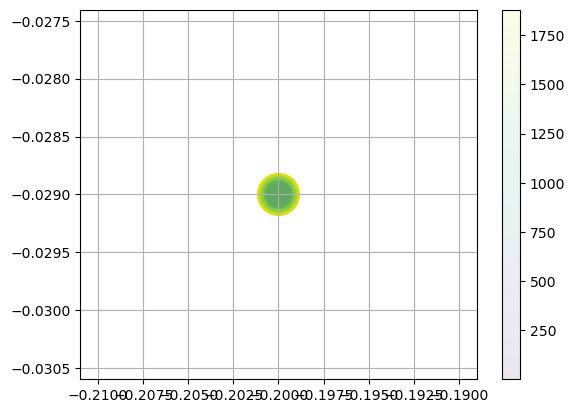

In [21]:
plt.scatter(gnd_connection[:,0], gnd_connection[:,1],s=gnd_connection[:,2]/2,c=gnd_connection[:,2], alpha=0.1, edgecolors='none')
plt.grid()
plt.colorbar()

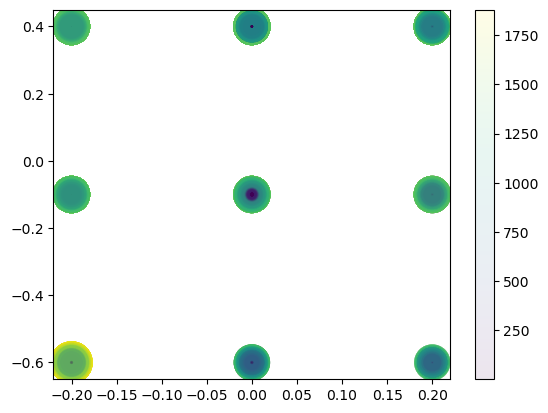

In [22]:
plt.scatter(main_connection[:,0], main_connection[:,1],s=main_connection[:,2]/2,c=main_connection[:,2], alpha=0.1, edgecolors='none')
# plt.grid()
plt.colorbar()

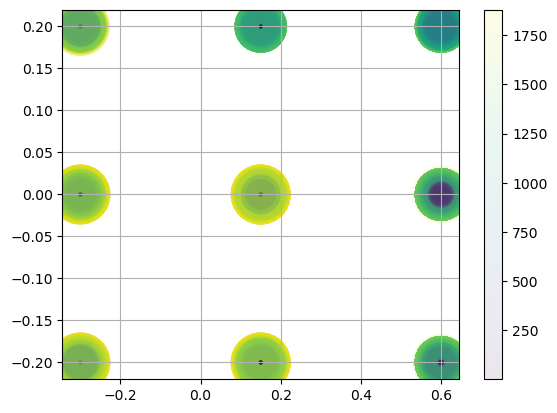

In [23]:
plt.scatter(branch[:,0], branch[:,1],s=branch[:,2]/1,c=branch[:,2], alpha=0.1, edgecolors='none')
plt.grid()
plt.colorbar()

In [24]:
from auto_robot_design.pinokla.default_traj import add_auxilary_points_to_trajectory


gm = dataset.graph_manager
des_point = np.array([-0.1, -0.35])
traj = np.array(add_auxilary_points_to_trajectory(([des_point[0]], [des_point[1]]))).T
ws_test.check_points_in_ws(traj)


True

In [25]:
from auto_robot_design.motion_planning.trajectory_ik_manager import TrajectoryIKManager
from auto_robot_design.vizualization.meshcat_utils import create_meshcat_vizualizer
fixed_robot = ws_test.robot
traj_6d = fixed_robot.motion_space.get_6d_traj(traj)
ik_manager = TrajectoryIKManager()
ik_manager.register_model(fixed_robot.model, fixed_robot.constraint_models)
ik_manager.set_solver("Closed_Loop_PI")
poses, q_fixed, constraint_errors,reach_array = ik_manager.follow_trajectory(traj_6d)

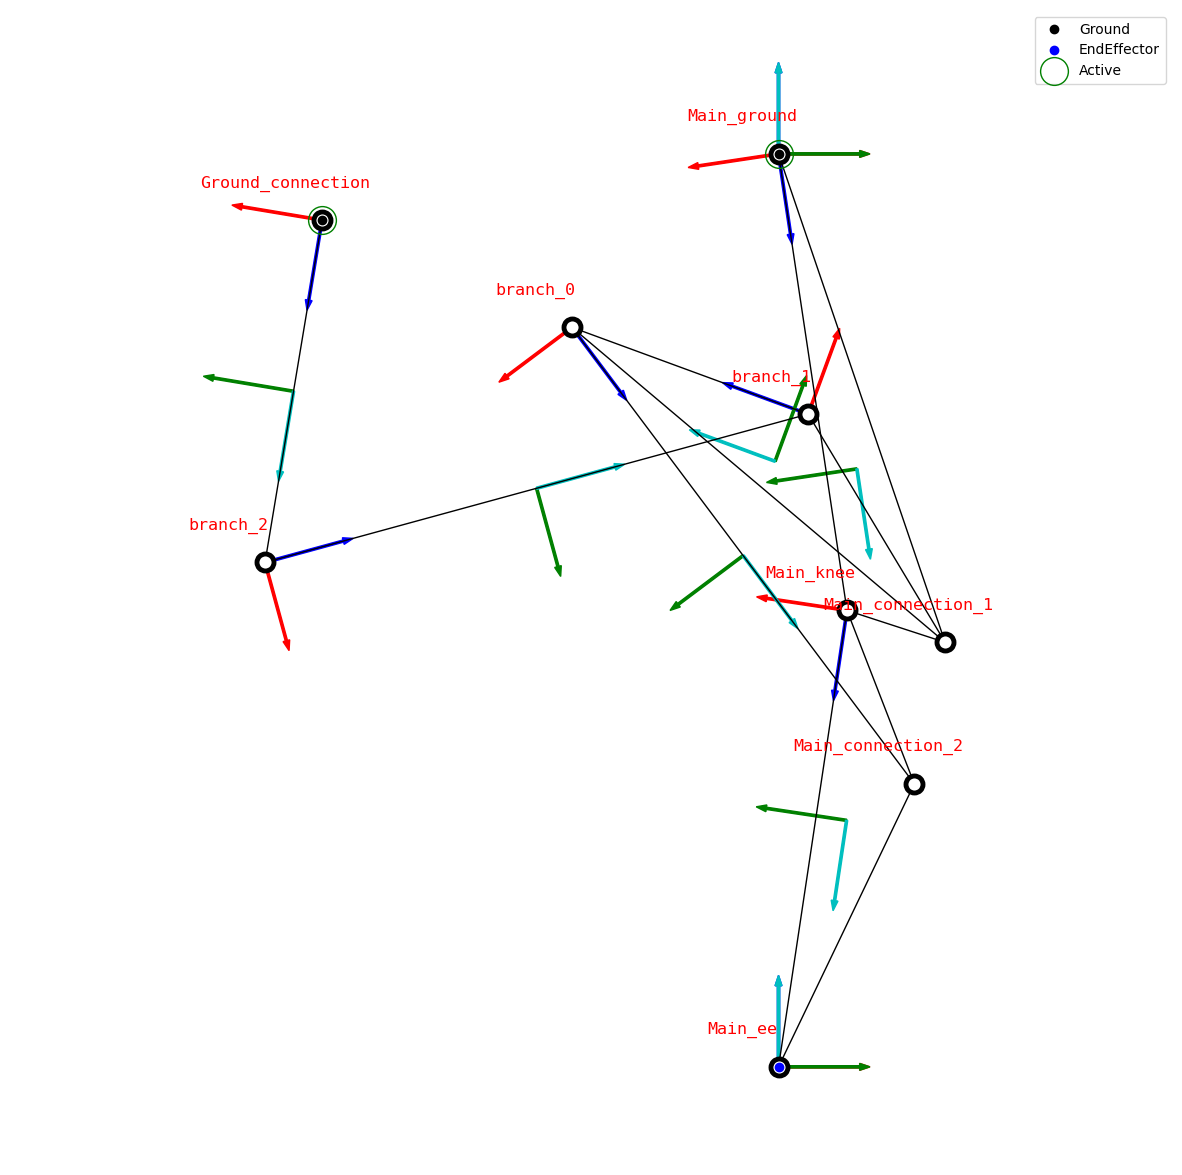

In [36]:
from auto_robot_design.description.mechanism import JointPoint2KinematicGraph, KinematicGraph
from auto_robot_design.description.utils import draw_joint_point, draw_kinematic_graph, draw_link_frames

graph = gm.get_graph(sort_dataset[id_design][:dataset.params_size])
kinematic_graph = JointPoint2KinematicGraph(graph)
kinematic_graph.define_main_branch()
kinematic_graph.define_span_tree()

kinematic_graph.define_link_frames()

draw_link_frames(kinematic_graph)
draw_joint_point(graph)
plt.show()

In [ ]:
from auto_robot_design.description.utils import draw_joint_point
from auto_robot_design.optimization.problems import MultiCriteriaProblem
from auto_robot_design.optimization.optimizer import PymooOptimizer
from auto_robot_design.pinokla.calc_criterion import ActuatedMass, EffectiveInertiaCompute, MovmentSurface, NeutralPoseMass, ManipJacobian
from auto_robot_design.pinokla.criterion_agregator import CriteriaAggregator
from auto_robot_design.pinokla.default_traj import add_auxilary_points_to_trajectory, convert_x_y_to_6d_traj_xz, get_vertical_trajectory, create_simple_step_trajectory, get_workspace_trajectory
from auto_robot_design.optimization.rewards.reward_base import PositioningConstrain, PositioningErrorCalculator, RewardManager
from auto_robot_design.optimization.rewards.jacobian_and_inertia_rewards import HeavyLiftingReward, MinAccelerationCapability
from auto_robot_design.description.builder import ParametrizedBuilder, DetailedURDFCreatorFixedEE, jps_graph2pinocchio_robot, MIT_CHEETAH_PARAMS_DICT
from auto_robot_design.generator.topologies.graph_manager_2l import GraphManager2L, get_preset_by_index
from auto_robot_design.generator.topologies.bounds_preset import get_preset_by_index_with_bounds
from auto_robot_design.optimization.saver import ProblemSaver

dict_trajectory_criteria = {
    "MASS": NeutralPoseMass(),
}
# criteria calculated for each point on the trajectory
dict_point_criteria = {
    "Effective_Inertia": EffectiveInertiaCompute(),
    "Actuated_Mass": ActuatedMass(),
    "Manip_Jacobian": ManipJacobian(MovmentSurface.XZ)
}
# special object that calculates the criteria for a robot and a trajectory
crag = CriteriaAggregator(dict_point_criteria, dict_trajectory_criteria)

# set the rewards and weights for the optimization task
acceleration_capability = MinAccelerationCapability(manipulability_key='Manip_Jacobian',
                                                    trajectory_key="traj_6d", error_key="error", actuated_mass_key="Actuated_Mass")

heavy_lifting = HeavyLiftingReward(
    manipulability_key='Manip_Jacobian', trajectory_key="traj_6d", error_key="error", mass_key="MASS")

# set up special classes for reward calculations
error_calculator = PositioningErrorCalculator(
    error_key='error', jacobian_key="Manip_Jacobian")

In [27]:
import meshcat
from pinocchio.visualize import MeshcatVisualizer

# viz = MeshcatVisualizer(fixed_robot.model, fixed_robot.visual_model, fixed_robot.visual_model)
# viz.viewer = meshcat.Visualizer()
# viz.viewer.jupyter_cell()
# viz.viewer["/Background"].set_property("visible", False)
# viz.viewer["/Grid"].set_property("visible", False)
# viz.viewer["/Axes"].set_property("visible", False)
# viz.viewer["/Cameras/default/rotated/<object>"].set_property("position", [0,0,0.5])
# viz.clean()
# viz.loadViewerModel()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


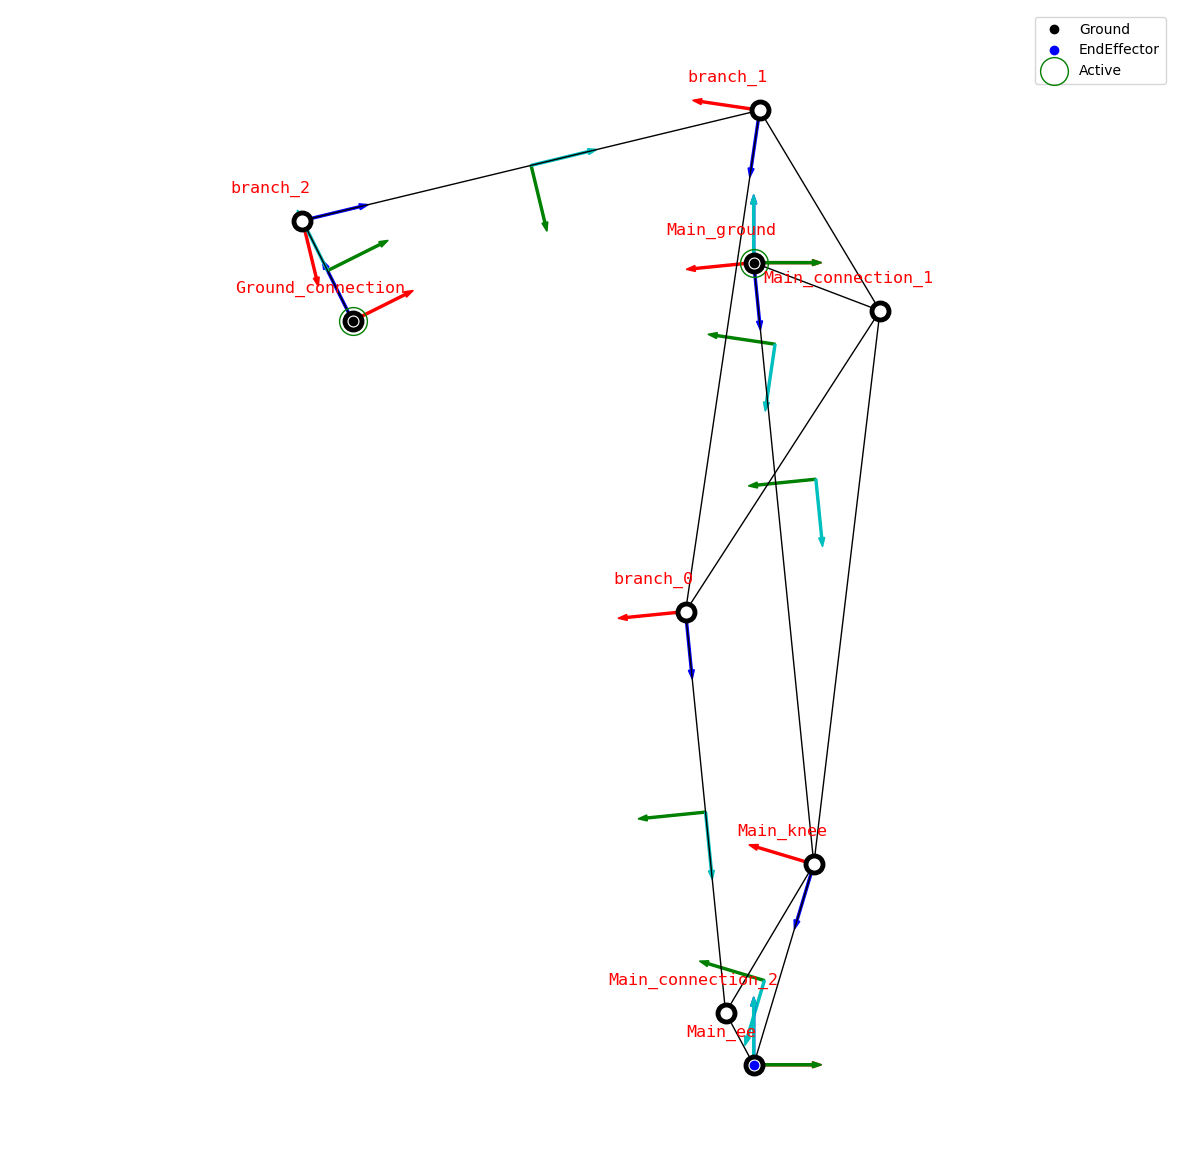

id: 18194, volume ws: 734.0
Mean q start: point in ws: True, get_des_points: False, time to get: 0.00047
Full traj: point in ws: True, get_des_points: True, time to get: 0.04503
Init: [-0.248  0.183  0.325  0.132 -0.024  0.605]
Fast method: [0. 0. 0. 0. 0. 0.]
Full check: [ 0.952 -0.993  0.515 -0.394  0.125  0.67 ]



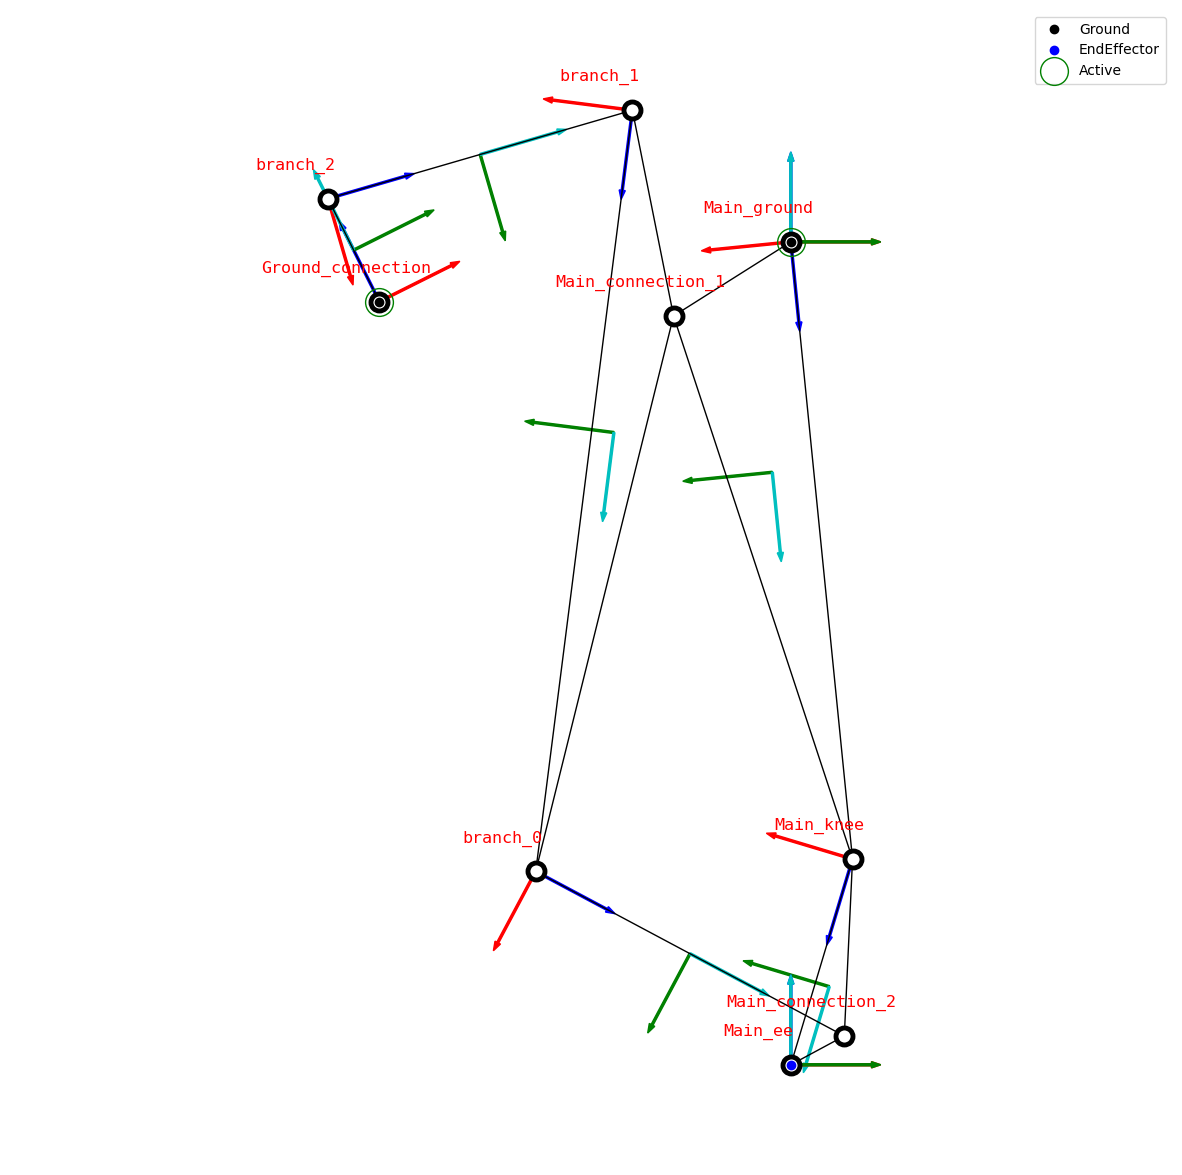

id: 52565, volume ws: 979.0
Mean q start: point in ws: True, get_des_points: False, time to get: 0.00040
Full traj: point in ws: True, get_des_points: True, time to get: 0.05141
Init: [-0.248  0.183  0.325  0.132 -0.024  0.605]
Fast method: [0. 0. 0. 0. 0. 0.]
Full check: [ 0.558 -0.577  0.349 -0.217  0.125  0.67 ]

id: 5559, volume ws: 581.0
Mean q start: point in ws: True, get_des_points: True, time to get: 0.00127
Full traj: point in ws: True, get_des_points: True, time to get: 0.03211
Init: [-0.248  0.183  0.325  0.132 -0.024  0.605]
Fast method: [-0.015 -0.016  0.44   0.064  0.125  0.67 ]
Full check: [-0.015 -0.016  0.44   0.064  0.125  0.67 ]



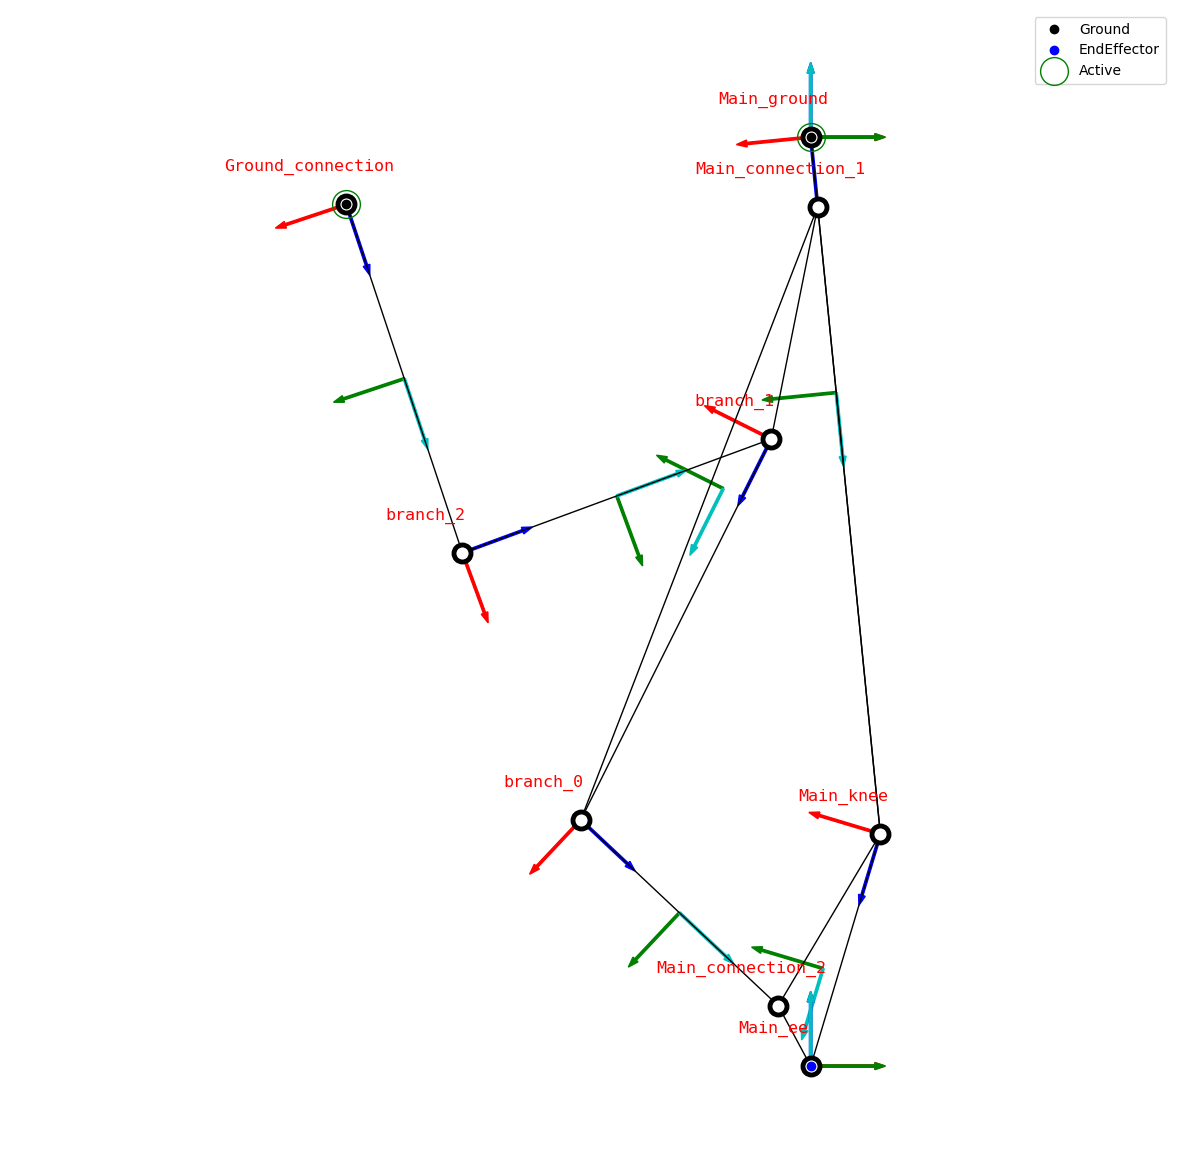

id: 37482, volume ws: 962.0
Mean q start: point in ws: True, get_des_points: False, time to get: 0.00036
Full traj: point in ws: True, get_des_points: True, time to get: 0.04131
Init: [-0.248  0.183  0.325  0.132 -0.024  0.605]
Fast method: [0. 0. 0. 0. 0. 0.]
Full check: [ 0.173 -0.311  0.462 -0.394  0.125  0.67 ]

id: 11865, volume ws: 1386.0
Mean q start: point in ws: True, get_des_points: True, time to get: 0.00132
Full traj: point in ws: True, get_des_points: True, time to get: 0.03330
Init: [-0.248  0.183  0.325  0.132 -0.024  0.605]
Fast method: [ 0.13  -0.152  0.329 -0.07   0.125  0.67 ]
Full check: [ 0.13  -0.152  0.33  -0.07   0.125  0.67 ]

id: 34352, volume ws: 520.0
Mean q start: point in ws: True, get_des_points: True, time to get: 0.00131
Full traj: point in ws: True, get_des_points: True, time to get: 0.03282
Init: [-0.248  0.183  0.325  0.132 -0.024  0.605]
Fast method: [-0.164  0.174  0.058  0.123  0.125  0.67 ]
Full check: [-0.164  0.174  0.059  0.123  0.125  0.67 ]


In [38]:
import time
import meshcat
from pinocchio.visualize import MeshcatVisualizer
num_tests = 10
num_design_include_point = 0
num_design_get_points = 0
num_design_get_points_from_init = 0
for i in range(num_tests):
    id_design = np.random.randint(0, dataset.df.shape[0])
    sample = dataset.df.loc[id_design]
    ws = dataset.get_workspace_by_sample(sample)
    point_in_ws = ws.check_points_in_ws(des_point[np.newaxis,:])
    
    pos_jps = sample.values[:dataset.params_size]
    amount_ws = np.sum(sample.values[dataset.params_size:])
    ellps = 0
    ellps2 = 0
    get_des_points = False
    get_des_points_by_init = False
    if point_in_ws:
        num_design_include_point +=1
        fixed_robot = ws.robot
        traj_6d = fixed_robot.motion_space.get_6d_traj(des_point[np.newaxis,:])
        ik_manager = TrajectoryIKManager()
        ik_manager.register_model(fixed_robot.model, fixed_robot.constraint_models)
        ik_manager.set_solver("Closed_Loop_PI")
        start = time.perf_counter()
        __, q_arrs_fast, __,reach_array = ik_manager.follow_trajectory(traj_6d,q_fixed[-1])
        end = time.perf_counter()
        get_des_points = bool(reach_array[0])
        ellps = end - start
        
        # if not get_des_points:
        #     # print(fixed_robot.model)
        #     viz = MeshcatVisualizer(fixed_robot.model, fixed_robot.visual_model, fixed_robot.visual_model)
        #     viz.viewer = meshcat.Visualizer().open()
        #     # viz.viewer.jupyter_cell()
        #     viz.viewer["/Background"].set_property("visible", False)
        #     viz.viewer["/Grid"].set_property("visible", True)
        #     viz.viewer["/Axes"].set_property("visible", False)
        #     viz.viewer["/Cameras/default/rotated/<object>"].set_property("position", [0,0,0.5])
        #     viz.clean()
        #     viz.loadViewerModel()
        #     viz.display(q_fixed[-1])
        #     kinematic_graph = JointPoint2KinematicGraph(gm.get_graph(pos_jps))
        #     kinematic_graph.define_main_branch()
        #     kinematic_graph.define_span_tree()

        #     kinematic_graph.define_link_frames()

        #     draw_link_frames(kinematic_graph)
        #     draw_joint_point(graph)
        #     plt.show()
        
        traj_6d = fixed_robot.motion_space.get_6d_traj(traj)
        ik_manager = TrajectoryIKManager()
        ik_manager.register_model(fixed_robot.model, fixed_robot.constraint_models)
        ik_manager.set_solver("Closed_Loop_PI")
        start = time.perf_counter()
        __, q_arrs_full, __,reach_array = ik_manager.follow_trajectory(traj_6d)
        end = time.perf_counter()
        get_des_points_by_init = bool(reach_array[-1])
        ellps2 = end - start
        
        # if not get_des_points:
        #     viz = MeshcatVisualizer(fixed_robot.model, fixed_robot.visual_model, fixed_robot.visual_model)
        #     viz.viewer = meshcat.Visualizer().open()
        #     # viz.viewer.jupyter_cell()
        #     viz.viewer["/Background"].set_property("visible", True)
        #     viz.viewer["/Grid"].set_property("visible", False)
        #     viz.viewer["/Axes"].set_property("visible", False)
        #     viz.viewer["/Cameras/default/rotated/<object>"].set_property("position", [0,0,0.5])
        #     viz.clean()
        #     viz.loadViewerModel()
        #     viz.display(q_arrs_full[-1])
        
        num_design_get_points += 1 if get_des_points else 0 
        num_design_get_points_from_init += 1 if get_des_points_by_init else 0 
    print(f"id: {id_design:}, volume ws: {amount_ws}")
    print(f"Mean q start: point in ws: {point_in_ws}, get_des_points: {get_des_points}, time to get: {ellps:.5f}")
    print(f"Full traj: point in ws: {point_in_ws}, get_des_points: {get_des_points_by_init}, time to get: {ellps2:.5f}")
    print(f"Init: {q_fixed[-1].round(3)}")
    print(f"Fast method: {q_arrs_fast[-1].round(3)}")
    print(f"Full check: {q_arrs_full[-1].round(3)}")
    print()
print(f"Num tests: {num_tests}")
print(f"Num include point: {num_design_include_point}, get point: {num_design_get_points}, get point_from_init: {num_design_get_points_from_init}")